Our goal is to evaluate the performance of Gold and VIX as a hedge to US stock market. Our 
analysis will include data from 01-01-2007 until 03-31-2020.

1. Download time series of data using the Yahoo API for S&P500 (^GSPC), Nasdaq (^IXIC), Gold (GLD), VIX (^VIX) from 01-01-2007 until 03-31-2020

In [1]:
import yfinance as yf

In [2]:
data = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2020-03-31')

[*********************100%***********************]  4 of 4 completed


In [6]:
len(data['Adj Close'])

3333

In [3]:
data.head()

Adj Close                                       Close  \
                  GLD        ^GSPC        ^IXIC   ^VIX        GLD   
Date                                                                
2007-01-03  62.279999  1416.599976  2423.159912  12.04  62.279999   
2007-01-04  61.650002  1418.339966  2453.429932  11.51  61.650002   
2007-01-05  60.169998  1409.709961  2434.250000  12.14  60.169998   
2007-01-08  60.480000  1412.839966  2438.199951  12.00  60.480000   
2007-01-09  60.849998  1412.109985  2443.830078  11.91  60.849998   

                                                  High               ...  \
                  ^GSPC        ^IXIC   ^VIX        GLD        ^GSPC  ...   
Date                                                                 ...   
2007-01-03  1416.599976  2423.159912  12.04  64.019997  1429.420044  ...   
2007-01-04  1418.339966  2453.429932  11.51  62.500000  1421.839966  ...   
2007-01-05  1409.709961  2434.250000  12.14  60.779999  1418.339966  ...   
2007-01-08  1412.839966  2438.199951  12.00  60.540001  1414.979980  ...   
2007-01-09  1412.109985  2443.830078  11.91  61.090000  1415.609985  ...   

                    Low              Open                                   \
                  ^IXIC   ^VIX        GLD        ^GSPC        ^IXIC   ^VIX   
Date                                                                         
2007-01-03  2394.659912  11.53  63.580002  1418.030029  2429.719971  12.16   
2007-01-04  2413.750000  11.28  62.070000  1416.599976  2423.820068  12.40   
2007-01-05  2420.590088  11.68  60.750000  1418.339966  2445.070068  11.84   
2007-01-08  2421.129883  11.78  60.380001  1409.260010  2435.250000  12.48   
2007-01-09  2423.560059  11.69  60.139999  1412.839966  2443.260010  11.86   

              Volume                               
                 GLD       ^GSPC       ^IXIC ^VIX  
Date                                               
2007-01-03   8061900  3429160000  2435280000    0  
2007-01-04   4858600  3004460000  2104210000    0  
2007-01-05  12500100  2919400000  2060360000    0  
2007-01-08   3478700  2763340000  1905620000    0  
2007-01-09   4170400  3038380000  2144160000    0  

[5 rows x 24 columns]

2. We will use three periods in our analysis:
• 2007-2009 Bear market (01-01-2007 until 03-31-2009)
• 2009-2020 Bull Market (03-31-2009 until 01-31-2020)
• Covid19 Crisis (02-01-2020 until 03-31-2020)

3. Plot the aggregate statistics (min, mean, std, median, max) for the Close Prices and round the numbers to 2 decimals and export them to a .csv file using stats_<date>.csv

In [4]:
import pandas as pd
import numpy as np

In [5]:
aggregate_stats = data['Close'].aggregate([min, np.mean, np.std, np.median, max]).round(2)
aggregate_stats.to_csv = ("stats_<date>.csv")

4. Compute the cumulative performance of each asset from 01-01-2007 until 03-31-2020 (exclude the ^VIX)

In [6]:
CumReturns=((1+data['Adj Close'].pct_change()).cumprod()-1)*100

5. Plot the cumulative performance using Plotly (All assets in one graph except the ^VIX)

In [7]:
#!pip install plotly

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
fig = go.Figure() # create figure
fig.add_trace(go.Scatter(x=CumReturns.index, y=CumReturns['^GSPC'], mode='lines', line=dict(color='red',width=2), name='S&P500'))
fig.add_trace(go.Scatter(x=CumReturns.index, y=CumReturns['^IXIC'], mode='lines', line=dict(color='blue',width=2), name='Nasdaq'))
fig.add_trace(go.Scatter(x=CumReturns.index, y=CumReturns['GLD'], mode='lines', line=dict(color='green',width=2), name='Gold'))

fig.update_layout(
    title={'text':'Cumulative Performance','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
    xaxis=dict( title='Date'),
    yaxis=dict( title='CumReturns',ticksuffix="%"),
    #paper_bgcolor='rgba(0,0,0,0)',
    #plot_bgcolor='rgba(0,0,0,0)',
)

6. Compute the historical correlation from 01-01-2007 until 03-31-2020 

In [10]:
returns = data['Adj Close'].pct_change()
returns.corr().round(4)

GLD   ^GSPC   ^IXIC    ^VIX
GLD    1.0000  0.0262  0.0071 -0.0113
^GSPC  0.0262  1.0000  0.9606 -0.7194
^IXIC  0.0071  0.9606  1.0000 -0.7197
^VIX  -0.0113 -0.7194 -0.7197  1.0000

7. Plot the historical correlation using Plotly

In [11]:
corr_y1 = returns['^GSPC'].rolling(window=252).corr(returns['^IXIC'])
corr_y2 = returns['^GSPC'].rolling(window=252).corr(returns['GLD'])
corr_y3 = returns['^GSPC'].rolling(window=252).corr(returns['^VIX'])
corr_y4 = returns['^IXIC'].rolling(window=252).corr(returns['GLD'])
corr_y5 = returns['^IXIC'].rolling(window=252).corr(returns['^VIX'])
corr_y6 = returns['GLD'].rolling(window=252).corr(returns['^VIX'])

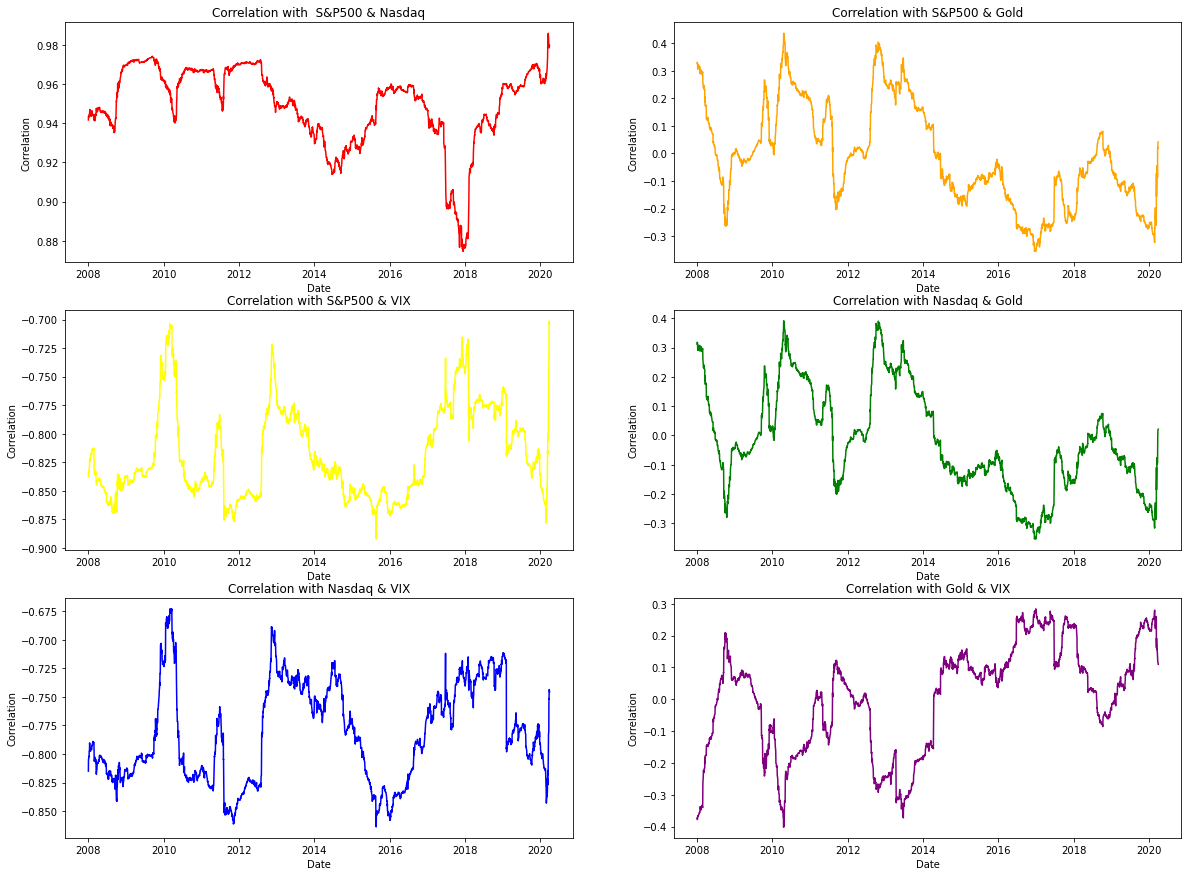

In [12]:
fig = plt.figure(figsize=(20,15)) # create figure
ax1 = plt.subplot(3,2,1)
ax1.plot(returns.index, corr_y1, color='red')
ax1.set_title('Correlation with  S&P500 & Nasdaq')
ax1.set_xlabel('Date')
ax1.set_ylabel('Correlation')

ax2 = plt.subplot(3,2,2)
ax2.plot(returns.index, corr_y2, color='orange')
ax2.set_title('Correlation with S&P500 & Gold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Correlation')

ax3 = plt.subplot(3,2,3)
ax3.plot(returns.index, corr_y3, color='yellow')
ax3.set_title('Correlation with S&P500 & VIX')
ax3.set_xlabel('Date')
ax3.set_ylabel('Correlation')

ax4 = plt.subplot(3,2,4)
ax4.plot(returns.index, corr_y4, color='green')
ax4.set_title('Correlation with Nasdaq & Gold')
ax4.set_xlabel('Date')
ax4.set_ylabel('Correlation')

ax5 = plt.subplot(3,2,5)
ax5.plot(returns.index, corr_y5, color='blue')
ax5.set_title('Correlation with Nasdaq & VIX')
ax5.set_xlabel('Date')
ax5.set_ylabel('Correlation')

ax6 = plt.subplot(3,2,6)
ax6.plot(returns.index, corr_y6, color='purple')
ax6.set_title('Correlation with Gold & VIX')
ax6.set_xlabel('Date')
ax6.set_ylabel('Correlation')

plt.savefig('Correlation_By_Asset_Pair.png')

# fig.add_trace(go.Scatter(x=returns.index, y=corr_y1, mode='lines', line=dict(color='red',width=2), name='Correlation with  S&P500 & Nasdaq'))
# fig.update_layout(
#    title={'text':'Correlation with  S&P500 & Nasdaq','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#    xaxis=dict( title='Date'),
#    yaxis=dict( title='Correlation',ticksuffix=""),
#     paper_bgcolor='rgba(0,0,0,0)',
#     plot_bgcolor='rgba(0,0,0,0)',
# )

# fig = go.Figure() # create figure
# fig.add_trace(go.Scatter(x=returns.index, y=corr_y2, mode='lines', line=dict(color='orange',width=2), name='Correlation with S&P500 & Gold'))
# fig.update_layout(
#    title={'text':'Correlation with S&P500 & Gold','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#    xaxis=dict( title='Date'),
#    yaxis=dict( title='Correlation',ticksuffix=""),
#     paper_bgcolor='rgba(0,0,0,0)',
#     plot_bgcolor='rgba(0,0,0,0)',
# )

# fig = go.Figure() # create figure
# fig.add_trace(go.Scatter(x=returns.index, y=corr_y3, mode='lines', line=dict(color='yellow',width=2), name='Correlation with S&P500 & VIX'))
# fig.update_layout(
#     title={'text':'Correlation with S&P500 & VIX','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#     xaxis=dict( title='Date'),
#     yaxis=dict( title='Correlation',ticksuffix=""),
#     #paper_bgcolor='rgba(0,0,0,0)',
#     #plot_bgcolor='rgba(0,0,0,0)',
# )

# fig = go.Figure() # create figure
# fig.add_trace(go.Scatter(x=returns.index, y=corr_y4, mode='lines', line=dict(color='green',width=2), name='Correlation with Nasdaq & Gold'))
# fig.update_layout(
#     title={'text':'Correlation with Nasdaq & Gold','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#     xaxis=dict( title='Date'),
#     yaxis=dict( title='Correlation',ticksuffix=""),
#     #paper_bgcolor='rgba(0,0,0,0)',
#     #plot_bgcolor='rgba(0,0,0,0)',
# )

# fig = go.Figure() # create figure
# fig.add_trace(go.Scatter(x=returns.index, y=corr_y5, mode='lines', line=dict(color='blue',width=2), name='Correlation with Nasdaq & VIX'))
# fig.update_layout(
#     title={'text':'Correlation with Nasdaq & VIX','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#     xaxis=dict( title='Date'),
#     yaxis=dict( title='Correlation',ticksuffix=""),
#     #paper_bgcolor='rgba(0,0,0,0)',
#     #plot_bgcolor='rgba(0,0,0,0)',
# )

# fig = go.Figure() # create figure
# fig.add_trace(go.Scatter(x=returns.index, y=corr_y6, mode='lines', line=dict(color='purple',width=2), name='Correlation with Gold & VIX'))
# fig.update_layout(
#     title={'text':'Correlation with Gold & VIX','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top' },
#     xaxis=dict( title='Date'),
#     yaxis=dict( title='Correlation',ticksuffix=""),
#     #paper_bgcolor='rgba(0,0,0,0)',
#     #plot_bgcolor='rgba(0,0,0,0)',
# )

8. For each time frame (including the total period 2007-2020):  
    a. Correlation Analysis:
        i. Identify the asset pairs with correlation >0.7
        ii. Identify the asset pairs with correlation <0.2
    b. Beta Analysis:
        i. Find the beta of GLD to S&P500 (Apply Linear Regression)
        ii. Find the beta of VIX to S&P500
        iii. Find the correlation of GLD to S&P500 
        iv. Find the correlation of VIX to S&P500
        v. Which one is a better hedge?
    c. Investigating Moving Averages:
        i. Calculate the 60-day and 180-day moving average of returns for ^GSPC
        ii. Plot the moving averages and the prices for ^GSPC
        iii. Create a function that finds the dates and counts the number of times ^GSPC is above the180-day moving average

In [13]:
# Correlation Analysis
def Correlation_Map(rets):
    corr_matrix = np.round(rets.corr().values, 2)
    
    z = corr_matrix
    x = list(rets.columns)
    y = list(rets.columns)
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z, colorscale='reds')
    fig.update_layout( title={'text':'Correlation Map', 'y':0.9, 'x':0.5})
    fig.show()

In [14]:
# 2007-2009 Bear market (01-01-2007 until 03-31-2009)
data_0709 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2009-03-31')['Close']
returns = data_0709.pct_change()
Correlation_Map(returns)

[*********************100%***********************]  4 of 4 completed


In [15]:
# 2009-2020 Bull Market (03-31-2009 until 01-31-2020)
data_0920 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2009-03-31', end='2020-01-31')['Close']
returns = data_0920.pct_change()
Correlation_Map(returns)

[*********************100%***********************]  4 of 4 completed


In [16]:
# Covid19 Crisis (02-01-2020 until 03-31-2020)
data_2020 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2020-02-01', end='2020-03-31')['Close']
returns = data_2020.pct_change()
Correlation_Map(returns)

[*********************100%***********************]  4 of 4 completed


In [17]:
# The total period: 2007-01-01 to 2020-03-31
data_0720 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2020-03-31')['Close']
returns = data_0720.pct_change()
Correlation_Map(returns)

[*********************100%***********************]  4 of 4 completed


In [18]:
# Beta Analysis
def Find_Beta(rets):
    #i. Find the beta of GLD to S&P500 (Apply Linear Regression)
    X_i = rets['^GSPC']
    Y_i = rets['GLD']
    model_i = sm.OLS(Y_i, X_i, missing = 'drop').fit()
    beta_GLD = model_i.params['^GSPC'].round(4)
    print('beta of GLD is', beta_GLD)
    
    #ii. Find the beta of VIX to S&P500
    X_ii = rets['^GSPC']
    Y_ii = rets['^VIX']
    model_ii = sm.OLS(Y_ii, X_ii, missing = 'drop').fit()
    beta_VIX = model_ii.params['^GSPC'].round(4)
    print('beta of VIX is', beta_VIX)
    
    #iii. Find the correlation of GLD to S&P500
    corr_iii = rets['^GSPC'].rolling(window=252).corr(rets['GLD'])
    plot_iii = corr_iii.plot(figsize=(10, 6), title='Correlation of S&P500 and GLD')
    plt.show()
    
    #iv. Find the correlation of VIX to S&P500
    corr_iv = rets['^GSPC'].rolling(window=252).corr(rets['^VIX'])
    plot_iv = corr_iv.plot(figsize=(10, 6), title='Correlation of S&P500 and VIX')
    plt.show()

[*********************100%***********************]  4 of 4 completed
beta of GLD is 0.02
beta of VIX is -3.038


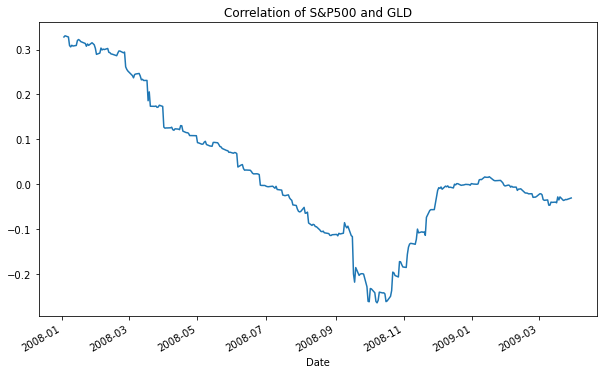

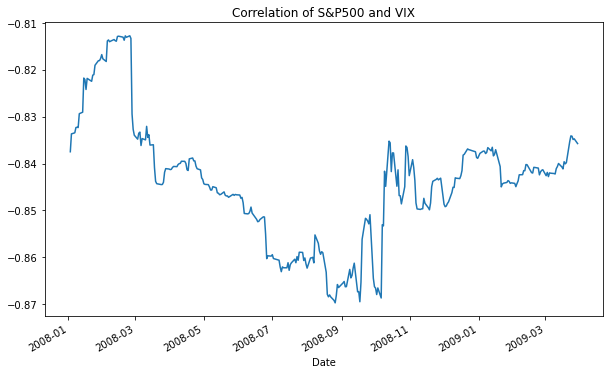

In [19]:
# 2007-2009 Bear market (01-01-2007 until 03-31-2009)
data_beta0709 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2009-03-31')['Close']
returns=data_beta0709.pct_change()
Find_Beta(returns)

VIX is a better hedge than Gold. Since VIX has correlation around -0.85 and beta -3.038 to S&P500. This means VIX will change in a different direction from S&P500.

[*********************100%***********************]  4 of 4 completed
beta of GLD is 0.0124
beta of VIX is -6.4557


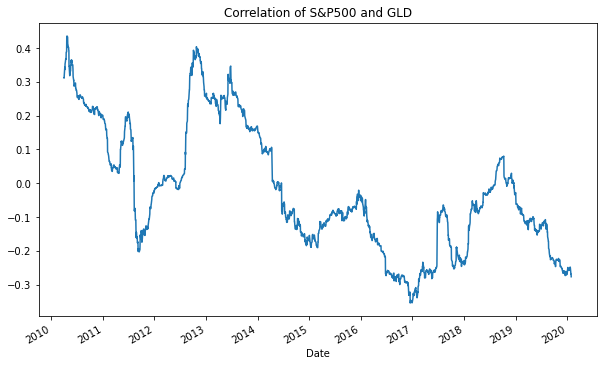

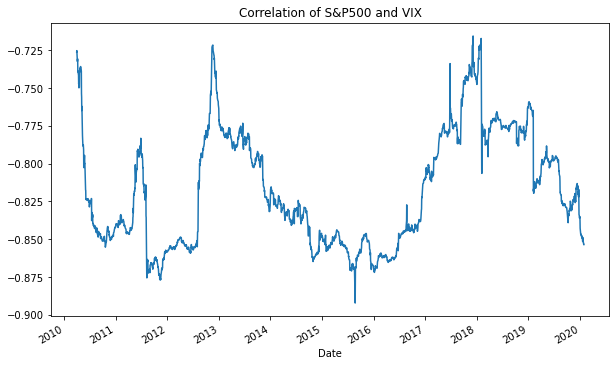

In [20]:
# 2009-2020 Bull Market (03-31-2009 until 01-31-2020)
data_beta0920 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2009-03-31', end='2020-01-31')['Close']
returns=data_beta0920.pct_change()
Find_Beta(returns)

VIX is a better hedge than Gold. Since VIX has correlation around -0.8 and beta -6.4557 to S&P500. This means VIX will change in a different direction from S&P500.

[*********************100%***********************]  4 of 4 completed
beta of GLD is 0.0719
beta of VIX is -2.8917


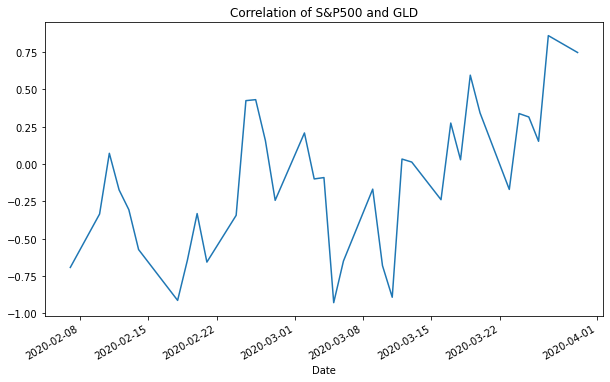

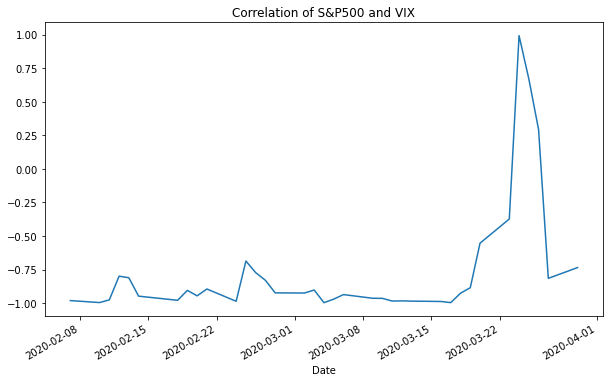

In [21]:
#  Covid19 Crisis (02-01-2020 until 03-31-2020)
def Find_Beta2(rets):
    #i. Find the beta of GLD to S&P500 (Apply Linear Regression)
    X_i = rets['^GSPC']
    Y_i = rets['GLD']
    model_i = sm.OLS(Y_i, X_i, missing = 'drop').fit()
    beta_GLD = model_i.params['^GSPC'].round(4)
    print('beta of GLD is', beta_GLD)
    
    #ii. Find the beta of VIX to S&P500
    X_ii = rets['^GSPC']
    Y_ii = rets['^VIX']
    model_ii = sm.OLS(Y_ii, X_ii, missing = 'drop').fit()
    beta_VIX = model_ii.params['^GSPC'].round(4)
    print('beta of VIX is', beta_VIX)
    
    #iii. Find the correlation of GLD to S&P500
    corr_iii = rets['^GSPC'].rolling(window=4).corr(rets['GLD'])
    plot_iii = corr_iii.plot(figsize=(10, 6), title='Correlation of S&P500 and GLD')
    plt.show()
    
    #iv. Find the correlation of VIX to S&P500
    corr_iv = rets['^GSPC'].rolling(window=4).corr(rets['^VIX'])
    plot_iv = corr_iv.plot(figsize=(10, 6), title='Correlation of S&P500 and VIX')
    plt.show()

data_beta2020 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2020-02-01', end='2020-03-31')['Close']
returns=data_beta2020.pct_change()
Find_Beta2(returns)

VIX is a better hedge than Gold. Since VIX has beta -2.8917 to S&P500. This means VIX will change in a different direction from S&P500.

[*********************100%***********************]  4 of 4 completed
beta of GLD is 0.0235
beta of VIX is -4.5416


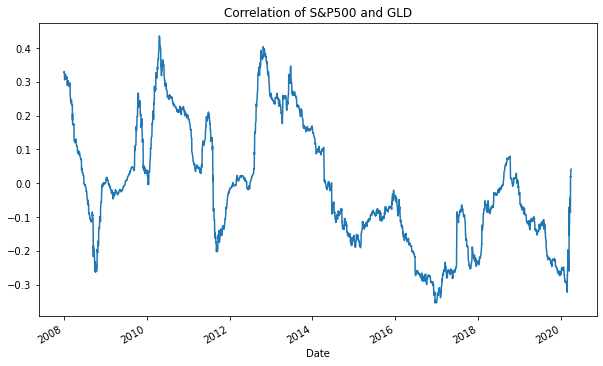

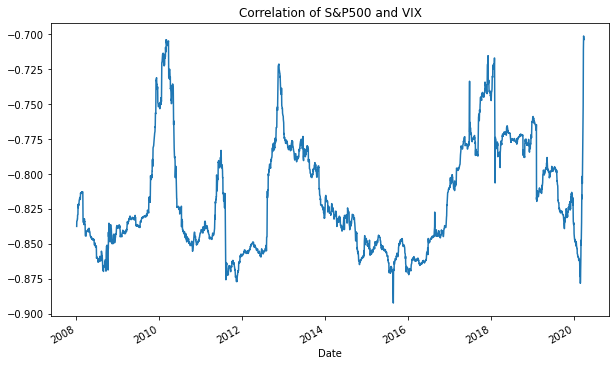

In [22]:
# 2007-01-01 to 2020-03-31
data_beta0720 = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2020-03-31')['Close']
returns=data_beta0720.pct_change()
Find_Beta(returns)

VIX is a better hedge than Gold. Since VIX has beta -4.5416 to S&P500. This means VIX will change in a different direction from S&P500.

In [23]:
# c. Investigating Moving Averages:
def Moving_Averages(data):
    data['60-MV'] = data["Close"].rolling(window=60).mean()
    data['180-MV'] = data["Close"].rolling(window=180).mean()
    plot=data[['Close','60-MV','180-MV']].plot(lw=2.0,figsize=(15,8))
    plt.show()
    
    count = data[data['Close'] > data['180-MV']]
    print('number of times =', len(count.index))
    return count[['Close','180-MV']]

[*********************100%***********************]  1 of 1 completed


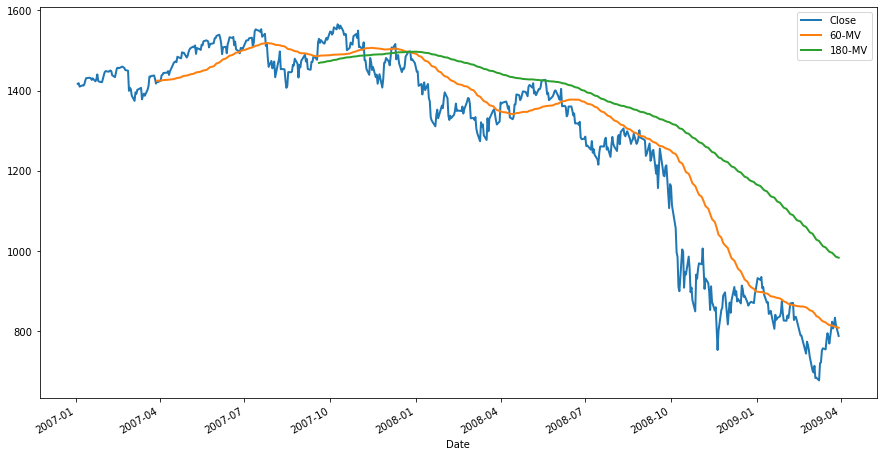

number of times = 42


Close       180-MV
Date                                
2007-09-19  1529.030029  1468.792056
2007-09-20  1518.750000  1469.359556
2007-09-21  1525.750000  1469.956278
2007-09-24  1517.729980  1470.556390
2007-09-25  1517.209961  1471.136223
2007-09-26  1525.420044  1471.765723
2007-09-27  1531.380005  1472.413112
2007-09-28  1526.750000  1472.984946
2007-10-01  1547.040039  1473.631113
2007-10-02  1546.630005  1474.268502
2007-10-03  1539.589966  1474.873891
2007-10-04  1542.839966  1475.520946
2007-10-05  1557.589966  1476.227001
2007-10-08  1552.579956  1476.947168
2007-10-09  1565.150024  1477.709168
2007-10-10  1562.469971  1478.388835
2007-10-11  1554.410034  1479.113890
2007-10-12  1561.800049  1479.889557
2007-10-15  1548.709961  1480.601168
2007-10-16  1538.530029  1481.210668
2007-10-17  1541.239990  1481.782890
2007-10-18  1540.079956  1482.305891
2007-10-19  1500.630005  1482.596113
2007-10-22  1506.329956  1482.925779
2007-10-23  1519.589966  1483.323501
2007-10-24  1515.880005  1483.689390
2007-10-25  1514.400024  1484.056557
2007-10-26  1535.280029  1484.596667
2007-10-29  1540.979980  1485.194501
2007-10-30  1531.020020  1485.676501
2007-10-31  1549.380005  1486.199167
2007-11-01  1508.439941  1486.486000
2007-11-02  1509.650024  1486.786611
2007-11-05  1502.170044  1487.022666
2007-11-06  1520.270020  1487.370667
2007-12-06  1507.339966  1493.288555
2007-12-07  1504.660034  1493.669389
2007-12-10  1515.959961  1494.105278
2007-12-24  1496.449951  1496.259888
2007-12-26  1497.660034  1496.586499
2008-05-16  1425.349976  1425.205223
2008-05-19  1426.630005  1425.032945

In [24]:
#  2007-2009 Bear market (01-01-2007 until 03-31-2009)
data_MA0709 = yf.download("^GSPC", start = '2007-01-01', end = '2009-03-31')
Moving_Averages(data_MA0709)

[*********************100%***********************]  1 of 1 completed


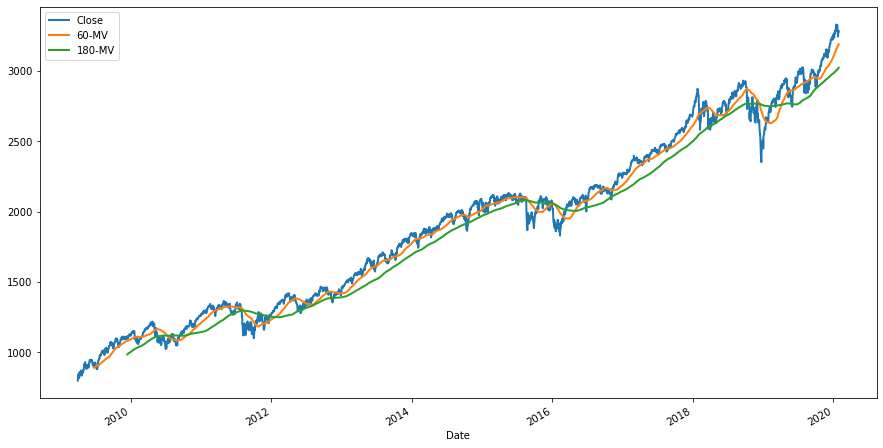

number of times = 2154


Close       180-MV
Date                                
2009-12-14  1114.109985   983.597999
2009-12-15  1107.930054   985.320555
2009-12-16  1109.180054   986.976666
2009-12-17  1096.079956   988.430555
2009-12-18  1102.469971   989.874832
...                 ...          ...
2020-01-24  3295.469971  3012.565107
2020-01-27  3243.629883  3014.636829
2020-01-28  3276.239990  3016.830385
2020-01-29  3273.399902  3019.394439
2020-01-30  3283.659912  3021.890272

[2154 rows x 2 columns]

In [25]:
# 2009-2020 Bull Market (03-31-2009 until 01-31-2020)
data_MA0920 = yf.download("^GSPC", start = '2009-03-31', end = '2020-01-31')
Moving_Averages(data_MA0920)

[*********************100%***********************]  1 of 1 completed


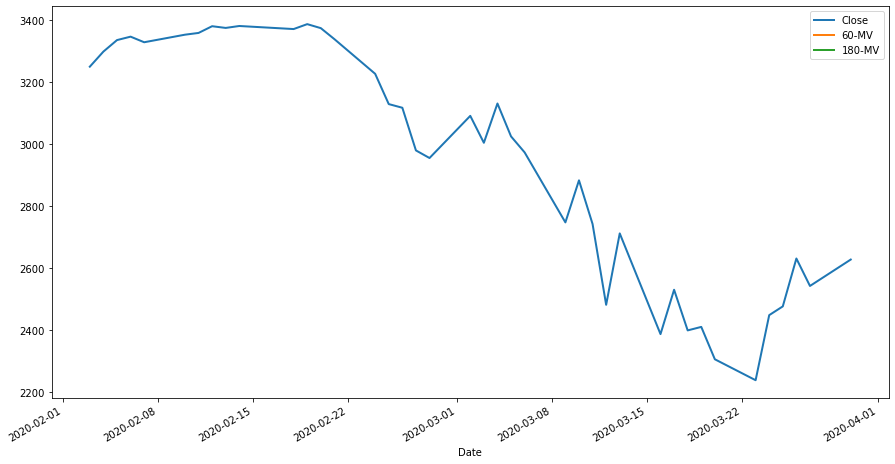

number of times = 0


Empty DataFrame
Columns: [Close, 180-MV]
Index: []

In [26]:
# Covid19 Crisis (02-01-2020 until 03-31-2020)
data_MA2020 = yf.download("^GSPC", start = '2020-02-01', end = '2020-03-31')
Moving_Averages(data_MA2020)

[*********************100%***********************]  1 of 1 completed


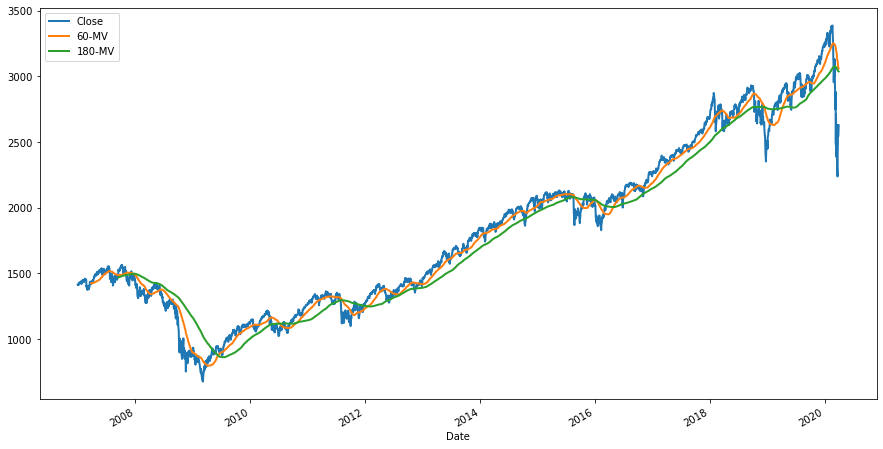

number of times = 2360


Close       180-MV
Date                                
2007-09-19  1529.030029  1468.792056
2007-09-20  1518.750000  1469.359556
2007-09-21  1525.750000  1469.956278
2007-09-24  1517.729980  1470.556390
2007-09-25  1517.209961  1471.136223
...                 ...          ...
2020-02-24  3225.889893  3067.319436
2020-02-25  3128.209961  3068.735380
2020-02-26  3116.389893  3070.011268
2020-03-02  3090.229980  3072.044657
2020-03-04  3130.120117  3074.027104

[2360 rows x 2 columns]

In [27]:
# 2007-01-01 to 2020-03-31
data_MA0720 = yf.download("^GSPC", start = '2007-01-01', end = '2020-03-31')
Moving_Averages(data_MA0720)

9. Change the frequency to monthly and compute the monthly returns

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

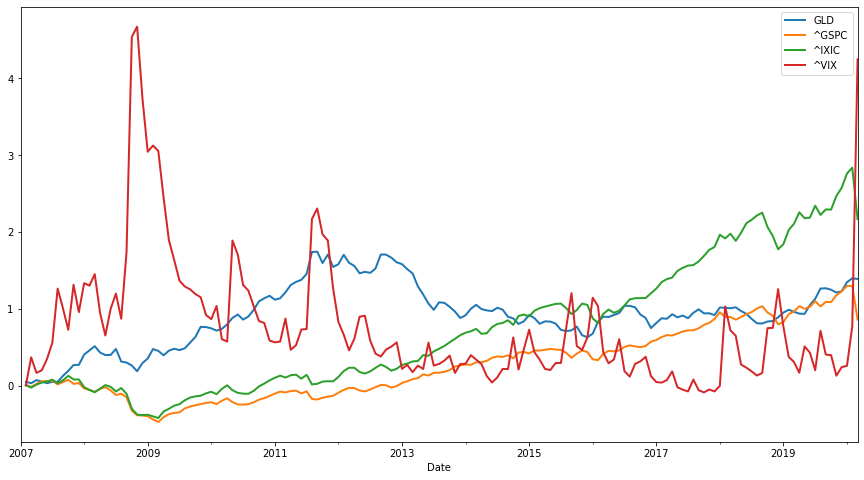

In [28]:
data = yf.download("^GSPC ^IXIC GLD ^VIX", start='2007-01-01', end='2020-03-31')
monthly_data = data['Close'].resample('1m').mean()
returns_monthly = monthly_data.pct_change()
Cum_Monthly_Returns = ((1+returns_monthly).cumprod()-1)

Cum_Monthly_Returns.plot(lw=2, figsize=(15,8))

10. Export the monthly returns to .csv file

In [29]:
Cum_Monthly_Returns.to_csv('Cum_Monthly_Returns.csv')